The equation which determines the exit intensity, $I_2$, as a function of the incident intensity, $I_1$, in a Fabry-Perot containing a non-linear medium (the refractive index is a function of the beam's own intensity) is:

\begin{align}
\frac{I_2}{I_1} = 
\frac{1/T}{1 + (4R/T^2) \sin^2 (\delta /2)}
\end{align}

where $R$, $T$ are, respectively, the reflection and transmission coefficients (where $R + T = 1$), and $\delta = \delta_0 + (4 n_2 L \omega / c) I_2$, $n_2$ is a constant characteristic of the material, $L$ is the Fabry-Perot length, $\omega$ is the frequency of the incident beam, $c$ is the speed of light, $\delta_0$ is a constant. For determined values of the parameters it is possible to have multiple solutions for the same beam intensity (optic bi-stability).

1. Write a program which determines $I_2(I_1)$, using the bisection method. Take into account that for certain values of $I_1$ there can be more than one solution.

2. Record a table of values of $I_2$ vs $I_1$ in the interval $[0, 1.5]$ (if you use the parameters below; otherwise use an interval sufficiently wide to demonstrate the bifurcation of solutions).

3. Produce a graph of $I_2(I_1)$.


**Suggestion:** Consider,

\begin{align}
R = .8
\qquad
\delta_0 = \pi/3
\qquad
4 n_2 L \omega / c = 1
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import approx

In [2]:
R = 0.8
T = 1 - R
d0 = np.pi/3
C = 1

In [3]:
def bisection(f, exact_root, positive_point, negative_point, iterations=100, stop_condition=-1, args=[]):
    a = positive_point
    b = negative_point  
    c = (b+a)/2
    
    points = np.full(iterations, np.inf)
    error = np.full(iterations, np.inf)
    
    i = 0
    while (i < iterations) and (min(error) > stop_condition):
        
        if f(c, *args) > 0:
            a = c
            
        elif f(c, *args) < 0:
            b = c
            
        else:
            return points[:i], error[:i], exact_root
            
        c = (b + a)/2
        
        error[i] = abs(c - exact_root)
        points[i] = c
        
        i += 1
        
    return points[:i-1], error[:i-1], exact_root

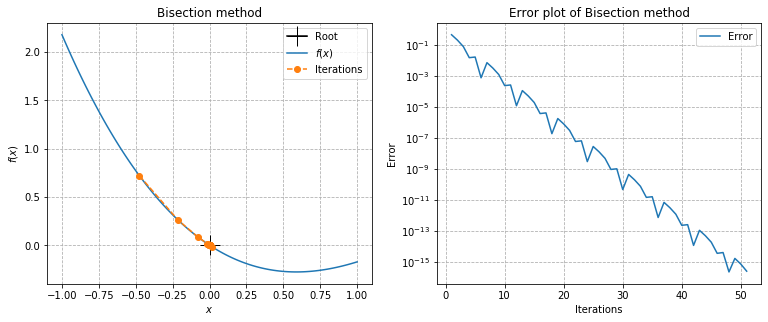

In [4]:
f = lambda x: np.exp(-x) - np.cos(x)

args = [f, 0, -1, 1.1, 100, 1e-16]

points, error, exact_root = bisection(*args)

title = 'Bisection method'

plt.figure(figsize=(12.8, 4.8))
plt.subplot(1,2,1)
approx.plot(title, points, f, exact_root)
plt.subplot(1,2,2)
approx.error_plot(title, error)

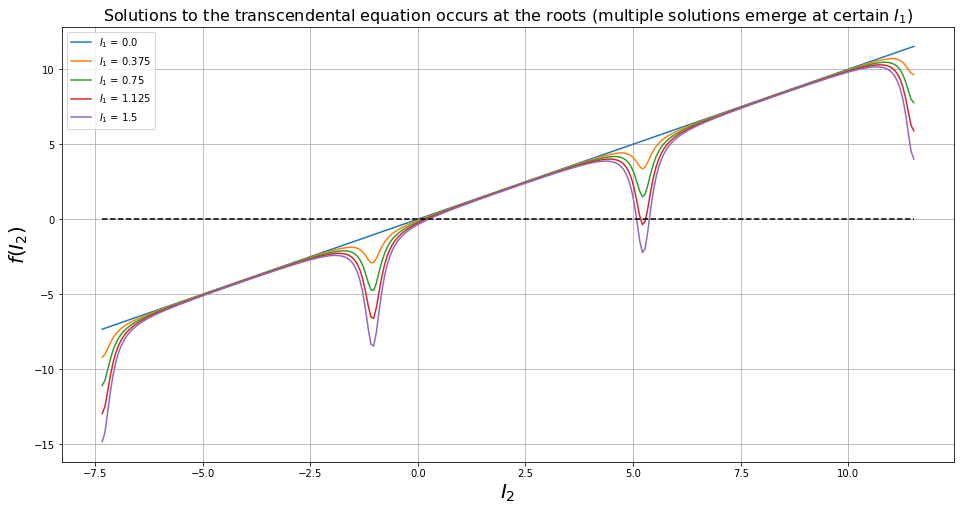

In [14]:
lbound = ( -d0/C ) - (2*np.pi)/C
ubound = ( (2*np.pi - d0)/C ) + 2 * np.pi/C

I2 = np.linspace(lbound, ubound, 300)
f = lambda I2, I1, T, R, d0, C : I2 - I1 * (1 / T) / (1 + (4 * R / T**2) * np.sin((d0 + C*I2)/2)**2)

width, height = plt.figaspect(.5) * 2
plt.figure(figsize=(width, height))
plt.title('Solutions to the transcendental equation occurs at the roots (multiple solutions emerge at certain $I_1$)', 
          fontsize=16)

for I1 in np.linspace(0, 1.5, 5):
    args = [I1, T, R, d0, C]
    plt.plot(I2, f(I2, *args), label='$I_1$ = ' + repr(I1))
    
plt.plot([lbound, ubound], [0, 0], 'k--')
plt.xlabel('$I_2$', fontsize=20)
plt.ylabel('$f(I_2)$', fontsize=20)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [6]:
def rootfinder(x, y, args=[]):
    
    '''Estimating roots'''
    
    estimated_root = 0
    estimated_roots = []
    
    for i in range(len(x)-1):
        if y(x[i], *args) * y(x[i+1], *args) < 0:
            estimated_root = (x[i] + x[i+1])/2
            estimated_roots.append(estimated_root)
    
    '''Approximating root with Bisection'''
    
    iterations = 100
    stop_condition = 1e-16
    
    dx = x[1] - x[0]
    
    x_roots = []
    errors_y = []
    
    for estimated_root in estimated_roots:
        a = estimated_root - dx
        b = estimated_root + dx
        fa = f(estimated_root - dx, *args)
        fb = f(estimated_root + dx, *args)
        
        if fa > 0 and fb < 0:
            positive_point = a
            negative_point = b
        elif fa < 0 and fb > 0:
            positive_point = b
            negative_point = a
        elif fa == 0 or fb == 0:
            c = min(abs(fa))
            x_roots.append(c)
        else:
            return 'Bissection condition failed at estimated_root: ' + repr(estimated_root)
        
        points, error = bisection(f, estimated_root, positive_point, negative_point, iterations, stop_condition, args)[0:2]
        x_root = points[-1]
        error_y = abs(y(x_root, *args))
        if error_y < 1e-12:
            x_roots.append(x_root)
            errors_y.append(error_y)
    
    return x_roots, errors_y

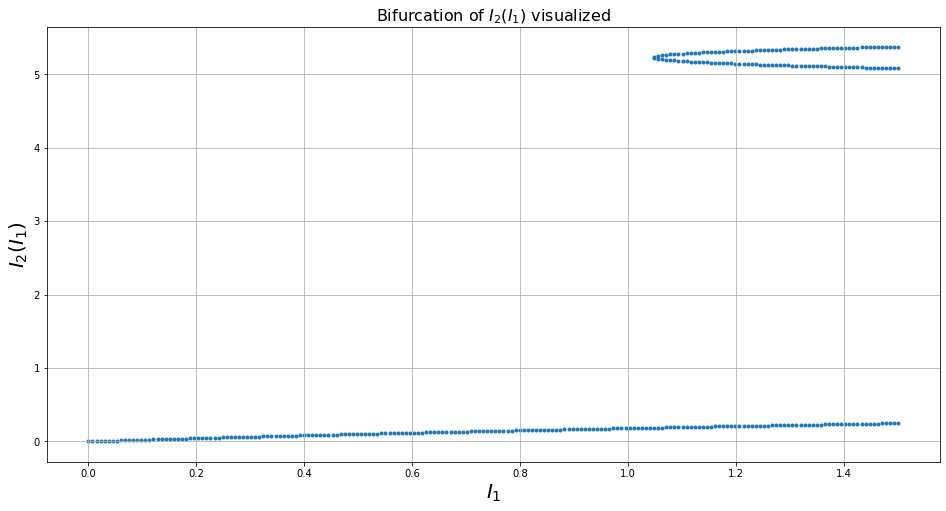

In [13]:
I2 = np.linspace(-0.01, 6, 1000)

I1_array = []
I2_array = []

width, height = plt.figaspect(.5) * 2
plt.figure(figsize=(width, height))
plt.title('Bifurcation of $I_2(I_1)$ visualized', fontsize=16)
for I1 in np.linspace(0, 1.5, 200):
    args = [I1, T, R, d0, C]
    x_roots, errors_y = rootfinder(I2, f, args)
    
    for i in range(len(x_roots)):
        I1_array.append(I1)
        I2_array.append(x_roots[i])
        

plt.scatter(I1_array, I2_array, marker='.')
plt.xlabel('$I_1$', fontsize=20)
plt.ylabel('$I_2(I_1)$', fontsize=20)
plt.grid(True)
plt.show()